In [1]:
from keras.datasets import reuters
(train_data, train_laber), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
import numpy as np
def vectorize_sequence(sequens, dimension = 10000):
    results = np.zeros((len(sequens), dimension))
    for i, seq in enumerate(sequens):
        results[i,seq] = 1.
    return results

In [3]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [4]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_laber)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 47ms/step - loss: 2.5990 - accuracy: 0.4774 - val_loss: 1.6715 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 1.3761 - accuracy: 0.7159 - val_loss: 1.2611 - val_accuracy: 0.7240
Epoch 3/20
16/16 [==============================] - 0s 31ms/step - loss: 1.0191 - accuracy: 0.7783 - val_loss: 1.1077 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 0s 30ms/step - loss: 0.8128 - accuracy: 0.8229 - val_loss: 1.0345 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 0s 30ms/step - loss: 0.6524 - accuracy: 0.8636 - val_loss: 0.9550 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 0.5250 - accuracy: 0.8923 - val_loss: 0.9309 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 0s 30ms/step - loss: 0.4245 - accuracy: 0.9112 - val_loss: 0.8979 - val_accuracy: 0.8060
Epoch 8/20
16

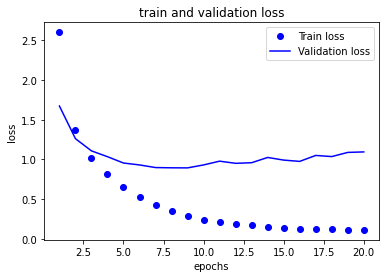

In [9]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('train and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

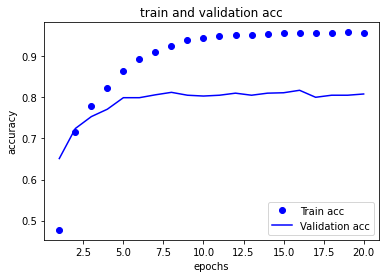

In [10]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Train acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('train and validation acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 43ms/step - loss: 2.7429 - accuracy: 0.4449 - val_loss: 1.8608 - val_accuracy: 0.6490
Epoch 2/9
16/16 [==============================] - 1s 33ms/step - loss: 1.4735 - accuracy: 0.7100 - val_loss: 1.3332 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 0s 31ms/step - loss: 1.0677 - accuracy: 0.7695 - val_loss: 1.1454 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 1s 31ms/step - loss: 0.8374 - accuracy: 0.8201 - val_loss: 1.0521 - val_accuracy: 0.7720
Epoch 5/9
16/16 [==============================] - 1s 32ms/step - loss: 0.6701 - accuracy: 0.8593 - val_loss: 0.9879 - val_accuracy: 0.7920
Epoch 6/9
16/16 [==============================] - 1s 32ms/step - loss: 0.5357 - accuracy: 0.8929 - val_loss: 0.9544 - val_accuracy: 0.8010
Epoch 7/9
16/16 [==============================] - 1s 32ms/step - loss: 0.4311 - accuracy: 0.9126 - val_loss: 0.9086 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

In [15]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 0.9671 - accuracy: 0.7956


In [16]:
results

[0.9670946002006531, 0.7956367135047913]

In [17]:
prediction = model.predict(x_test)

In [18]:
prediction

array([[2.1663953e-05, 1.1448825e-04, 3.0875341e-05, ..., 4.6277446e-06,
        9.6205931e-06, 3.7347177e-06],
       [2.0881491e-02, 4.9030866e-02, 1.3541943e-01, ..., 1.2225785e-05,
        4.7783037e-06, 6.7679078e-04],
       [3.2790281e-02, 7.6913196e-01, 1.7627984e-02, ..., 4.5827255e-04,
        7.0141046e-04, 1.0908355e-03],
       ...,
       [9.7654947e-06, 2.2974514e-04, 3.3815708e-05, ..., 4.0623687e-05,
        9.2568356e-05, 8.6949758e-06],
       [2.3499508e-03, 5.1898107e-02, 4.7842241e-03, ..., 5.8142236e-04,
        2.2603362e-03, 8.3614903e-04],
       [1.5628701e-02, 4.7788948e-01, 6.4328186e-02, ..., 8.3634345e-04,
        6.5420452e-04, 2.1512687e-04]], dtype=float32)